# Password Strength Classifier

In [1]:
import pandas as pd

## Pre-Processing The Dataset

In [2]:
dataset = pd.read_csv('dataset.csv', on_bad_lines='warn')       # there were bad fields whie reading the csv
dataset
dataset.dropna(inplace=True)

C:\Users\rafae\AppData\Local\Temp\ipykernel_15604\1721218856.py:1: ParserWarning: Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
S

### Feature Engineering
For entry in the Dataframe `dataset`, we add the additional following columns:
1. length: The length of the password in integers.
2. uppercase: The number of uppercase letters in the password as defined in Python's `string.ascii_uppercase` integers.
3. lowercase: The number of lowercase letters in the password as defined in Python's `string.ascii_lowercase` integers.
4. special_char: The number of **special_char**acters in the password as defined in Python's `string.punctuation` integers.

We will also remove the `password` field once we are finished.

We first create a function to generate the columns above:

In [3]:
import string

def get_pwd_characteristics(password: str, *, include_unknown=False) -> tuple:
    """Accepts a string and returns the characteristics of a password
    as a tuple using ASCII.

    The characteristics returned are ordered in the tuple as follows:
    1. The length of the password as `int`.
    2. The number of uppercase characters as defined in the Python
    SL `string.ascii_uppercase`.
    3. The number of lowercase characters as defined in the Python
    SL `string.ascii_lowercase`.
    4. The number of digits characters as defined in the Python SL
    `string.digits`.
    5. The number of special characters as defined in the Python SL
    `string.punctuation`.
    6. If `include_unknown` is set to to `True`, process characters
    outside the ASCII scheme.
    
    # Parameters
    password: str
        The password to be processed.
    include_unknown: bool
        `False` by default. Process characters outside the ASCII scheme.

    # Returns
    Return a `tuple` type with the characteristics above.
    """

    if type(password) is not str:
        raise TypeError(f'Expected str not {type(password)}')


    upper_count = 0
    lower_count = 0
    sc_count = 0        # sc stands for special character
    digit_count = 0
    unknowns = 0        # track non-ASCII characters

    for i in range(len(password)):
        if password[i] in string.ascii_uppercase:
            upper_count += 1
            continue
        if password[i] in string.ascii_lowercase:
            lower_count += 1
            continue
        if password[i] in string.punctuation:
            sc_count += 1
            continue
        if password[i] in string.digits:
            digit_count += 1
            continue
        if include_unknown:
            unknowns += 1
 
    if not include_unknown:
        return len(password), upper_count, lower_count, sc_count, digit_count
    return len(password), upper_count, lower_count, sc_count, digit_count, unknowns
    

In [4]:
# ====================================
# Unit Testing for the function above
# ====================================

print(get_pwd_characteristics('hello'))
print(get_pwd_characteristics('HELLO'))
print(get_pwd_characteristics('12345678'))
print(get_pwd_characteristics('!@#!@#$!%!#%#$%^#$^#&'))
try:
    print(get_pwd_characteristics(12312313123))
except TypeError:
    print(f'Function raised TypeError as expected')
print(get_pwd_characteristics('1Sfs"/xIz^oRYpXE(@p]jU|l^L?t97'))
print(get_pwd_characteristics('わわわわわわわわ'))
print(get_pwd_characteristics('わわわわわわわわ', include_unknown=True))

(5, 0, 5, 0, 0)
(5, 5, 0, 0, 0)
(8, 0, 0, 0, 8)
(21, 0, 0, 21, 0)
Function raised TypeError as expected
(30, 8, 10, 9, 3)
(8, 0, 0, 0, 0)
(8, 0, 0, 0, 0, 8)


Second, using the data from the columns above, we now generate the data of the columns we want to add to our dataset. Once the data has been generated, we insert them into the dataframe.

In [5]:
upper_count = []
lower_count = []
sc_count = []            # sc stands for special character
digit_count = []
length = []

for index, data in dataset.iterrows():
    l, uc, lc, dc, sc = get_pwd_characteristics(data['password'])
    length.append(l)
    upper_count.append(uc)
    lower_count.append(lc)
    sc_count.append(sc)
    digit_count.append(dc)

del uc, lc, sc, dc, l, index, data     # delete afterwards since they're not needed anymore

### Dataframe Editing
We now insert the lists into the dataset as additional columns.

In [6]:
dataset.insert(
    loc=dataset.shape[1],
    column='Uppercase Count',
    value=upper_count
)

dataset.insert(
    loc=dataset.shape[1],
    column='Lowercase Count',
    value=lower_count
)

dataset.insert(
    loc=dataset.shape[1],
    column='SpecialChar Count',
    value=sc_count
)

dataset.insert(
    loc=dataset.shape[1],
    column='Digit Count',
    value=digit_count
)

dataset.insert(
    loc=dataset.shape[1],
    column='Length',
    value=length
)

In [7]:
# delete afterwards since they're not needed anymore. They also have a large memory
# footprint with their size so it is best to delete them to free up space.
del upper_count, lower_count, digit_count, sc_count, length

In [8]:
dataset

,password,strength,Uppercase Count,Lowercase Count,SpecialChar Count,Digit Count,Length
0,kzde5577,1,0,4,4,0,8
1,kino3434,1,0,4,4,0,8
2,visi7k1yr,1,0,7,2,0,9
3,megzy123,1,0,5,3,0,8
4,lamborghin1,1,0,10,1,0,11
...,...,...,...,...,...,...,...
669635,10redtux10,1,0,6,4,0,10
669636,infrared1,1,0,8,1,0,9
669637,184520socram,1,0,6,6,0,12
669638,marken22a,1,0,7,2,0,9


We remove the `password` column. We do not need it anymore.

In [9]:
dataset.drop(columns=['password'], inplace=True)
dataset

,strength,Uppercase Count,Lowercase Count,SpecialChar Count,Digit Count,Length
0,1,0,4,4,0,8
1,1,0,4,4,0,8
2,1,0,7,2,0,9
3,1,0,5,3,0,8
4,1,0,10,1,0,11
...,...,...,...,...,...,...
669635,1,0,6,4,0,10
669636,1,0,8,1,0,9
669637,1,0,6,6,0,12
669638,1,0,7,2,0,9


We are ready to perform machine learning.

## Machine Learning

Now that the dataset is clean, we now have to do two things:
1. We need to split up the dataset between a training and testing dataset following the 80-20 principle.
2. Since we will use the `K Nearest Neighbors` algorithm, select a `K` value.
3. Check the model's accuracy.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from joblib import Parallel, delayed

First we divide up the dataset between training and testing datasets.

In [11]:
X=dataset[['Uppercase Count', 'Lowercase Count', 'SpecialChar Count', 'Digit Count', 'Length']]
X

,Uppercase Count,Lowercase Count,SpecialChar Count,Digit Count,Length
0,0,4,4,0,8
1,0,4,4,0,8
2,0,7,2,0,9
3,0,5,3,0,8
4,0,10,1,0,11
...,...,...,...,...,...
669635,0,6,4,0,10
669636,0,8,1,0,9
669637,0,6,6,0,12
669638,0,7,2,0,9


In [12]:
Y = dataset['strength']
Y

0         1
1         1
2         1
3         1
4         1
         ..
669635    1
669636    1
669637    1
669638    1
669639    1
Name: strength, Length: 669639, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, train_size=0.80, random_state=0)

We arbitarily set `K` to five. We could select other K values or write a function that could iterate through several K values. However, remember the dataset is 670,000 records large. Iterating through dozens of possible `K` values could require hours of runtime.

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_k(k: int, *, verbose=False) -> KNeighborsClassifier:
    if verbose:
        print("Generating pipeline with StandardScaler...")
    pipe = Pipeline(
    [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))]
    )

    if verbose:
        print("Fitting data into pipe...")
    pipe = pipe.fit(X_train, y_train)

    if verbose:
        print("Predicting labels on test data...")
    y_predict = pipe.predict(X_test)

    if verbose:
        print('Calculating accuracy score and generating confusion matrix...')
    score = accuracy_score(y_test, y_predict, normalize=True)
    cm = confusion_matrix(y_test, y_predict)

    if verbose:
        print('Finished evaluation.')

    predicted_count = len(y_predict)
    true_values = sum(cm.diagonal())
    false_values = predicted_count - true_values

    print('\n', f'===== Model Details =====')
    print(f"True Positive/Negative Values: {true_values}")
    print(f"False Positive/Negative Values: {false_values}")
    print(f"Accuracy: {score * 100:.2f}%")

    ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

    # confusion matrix
    return pipe[1]


Generating pipeline with StandardScaler...
Fitting data into pipe...
Predicting labels on test data...
Calculating accuracy score and generating confusion matrix...
Finished evaluation.

 ===== Model Details =====
True Positive/Negative Values: 133915
False Positive/Negative Values: 13
Accuracy: 99.99%


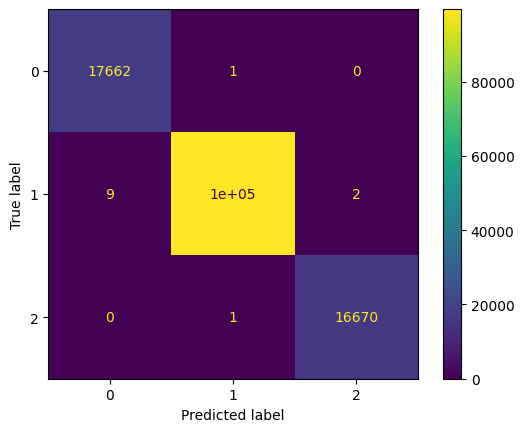

In [24]:
model = evaluate_k(5, verbose=True)

*Note: If a yellowbox in the middle displays 1e+05, it means that there are over 100,000 correct labels. The confusion matrix can't properly render it in decimal form because the number is too large display.*